In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
monthly_returns = pd.read_csv('monthly_return.csv')
monthly_returns_mean = monthly_returns.mean()
covariance_matrix = monthly_returns.cov()

num_assets = len(monthly_returns.keys()) - 1
num_portfolios = 50000

port_returns = []
port_volatility = []
stock_weights = []
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, monthly_returns_mean)
    volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)


portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

summary_portafolio = pd.DataFrame(stock_weights, columns=monthly_returns_mean.keys())
summary_portafolio['return'] = port_returns
summary_portafolio['volatility'] = port_volatility

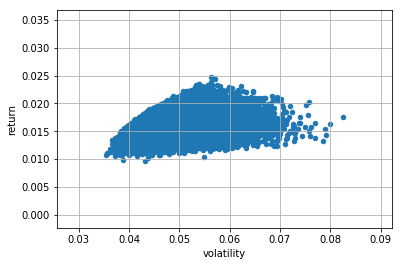

In [5]:
summary_portafolio.plot.scatter('volatility', 'return', grid=True)